In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-white')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# put your local path in here
df = pd.read_excel(r"C:\Users\ymehr\Downloads\ValidData-MitC2022data - SalesPopulation.xlsx",sheet_name='filtered')

In [3]:
df.head()

,NBHD,PID,Situs,PrpCls,PrUse,CDU,Qual,YrRD,Remd,Imp,...,Infl2,HSA_Acres,HSALandValue,TotAcres,V/I,Inst#,SaleDate,Price,SaleValidity,Sum801TLA
0,7HST242,09-13-434-003-000,2525 RIDGE RD,R1,1,4.0,6.0,NaN,NaN,R2,...,NaN,NaN,NaN,1.30,I,2016017053,2016-05-05,2122450.0,1,12026
1,7HSE361,16-11-404-012-000,5330 S 93RD PL,R1,1,4.0,6.0,NaN,NaN,RA,...,9.0,NaN,NaN,0.78,I,2022024921,2022-06-02,1950000.0,1,11047
2,7HSE361,16-11-404-013-000,5410 S 93RD PL,R1,1,4.0,5.0,NaN,NaN,RA,...,NaN,NaN,NaN,0.73,I,2021068025,2021-11-11,1875000.0,1,8816
3,7AEA310,23-31-416-001-000,11737 SEABISCUIT LN,R1,12,4.0,5.0,NaN,NaN,RA,...,NaN,2.03,1933-05-06 00:00:00,3.03,I,2022028838,2022-06-25,1850000.0,1,6935
4,7HST242,09-13-402-005-000,2421 RIDGE RD,R1,1,5.0,5.0,2022.0,6.0,RA,...,NaN,NaN,NaN,0.58,I,2022024045,2022-06-01,1800000.0,1,9936


In [4]:
df.columns

Index(['NBHD', 'PID', 'Situs', 'PrpCls', 'PrUse', 'CDU', 'Qual', 'YrRD',
       'Remd', 'Imp', 'TLA', 'YrBlt', 'GarCap', 'Bedrm', 'FND', '801Units',
       '802Units', '803Units', 'FP', 'FixCt', 'Pool', 'LandType', 'Acres',
       'LandValue', 'Infl1', 'Infl2', 'HSA_Acres', 'HSALandValue', 'TotAcres',
       'V/I', 'Inst#', 'SaleDate', 'Price', 'SaleValidity', 'Sum801TLA'],
      dtype='object')

In [5]:
df['SaleDate'].head()

0   2016-05-05
1   2022-06-02
2   2021-11-11
3   2022-06-25
4   2022-06-01
Name: SaleDate, dtype: datetime64[ns]

In [6]:
df['Raw Year'] = df['SaleDate'].apply(lambda x:x.year)

In [7]:
df.columns

Index(['NBHD', 'PID', 'Situs', 'PrpCls', 'PrUse', 'CDU', 'Qual', 'YrRD',
       'Remd', 'Imp', 'TLA', 'YrBlt', 'GarCap', 'Bedrm', 'FND', '801Units',
       '802Units', '803Units', 'FP', 'FixCt', 'Pool', 'LandType', 'Acres',
       'LandValue', 'Infl1', 'Infl2', 'HSA_Acres', 'HSALandValue', 'TotAcres',
       'V/I', 'Inst#', 'SaleDate', 'Price', 'SaleValidity', 'Sum801TLA',
       'Raw Year'],
      dtype='object')

In [15]:
min_year = min(df['Raw Year'])
df['Relative year'] = df['Raw Year'].apply(lambda x:x-min_year)
df.to_excel('valid_data_with_year.xlsx')

In [20]:
geolocator = Nominatim(user_agent="geoapiExercises")
pattern = re.compile(r'\d{5,}')

In [28]:
df['Modified Address'] = df['Situs'].apply(lambda x:x + 'Lancaster County, Nebraska, United States')

In [165]:
def get_zipcodes(address):
    try:
        location = geolocator.geocode(address,timeout=100000)
        zip = re.search(pattern, location.raw['display_name']).group()
        return zip
    except:
        return np.nan

temp = df['Modified Address'].apply(get_zipcodes)

In [27]:
location = geolocator.geocode('501 S 18th street Lancaster County Nebraska',timeout=100000)
location.raw['display_name']

'501, South 18th Street, Capitol View, Lincoln, Lancaster County, Nebraska, 68508, United States'

In [ ]:
df['Zipcode'] = temp
df.to_excel('data with zipcode.xlsx')

In [ ]:
len(temp.dropna())

In [ ]:
df['Zip Code'] = temp

In [4]:
df.corr()['Price']

PrUse           0.195567
CDU             0.120910
Qual            0.575430
YrRD           -0.005322
Remd            0.020230
TLA             0.689752
YrBlt           0.476923
GarCap          0.597921
Bedrm           0.167392
FND             0.349925
801Units        0.728121
802Units        0.185000
803Units        0.689107
FP              0.309291
FixCt           0.727844
Pool            0.398349
Acres           0.032477
LandValue       0.798683
Infl1           0.005623
Infl2           0.131819
HSA_Acres       0.061069
TotAcres        0.263807
Inst#           0.265492
Price           1.000000
SaleValidity   -0.000904
Sum801TLA       0.786005
Name: Price, dtype: float64

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34125 entries, 0 to 34124
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NBHD          34125 non-null  object        
 1   PID           34125 non-null  object        
 2   Situs         34125 non-null  object        
 3   PrpCls        34125 non-null  object        
 4   PrUse         34125 non-null  int64         
 5   CDU           34116 non-null  float64       
 6   Qual          34116 non-null  float64       
 7   YrRD          3698 non-null   float64       
 8   Remd          3790 non-null   float64       
 9   Imp           34116 non-null  object        
 10  TLA           34123 non-null  float64       
 11  YrBlt         34116 non-null  float64       
 12  GarCap        31197 non-null  float64       
 13  Bedrm         34115 non-null  float64       
 14  FND           34111 non-null  float64       
 15  801Units      29842 non-null  float6

In [6]:
useful_df = df[['Sum801TLA','LandValue','Qual','FixCt','GarCap','TLA','FND','Price']]

In [8]:
useful_df

,Sum801TLA,LandValue,Qual,FixCt,GarCap,TLA,FND,Price
0,12026,343850,6.0,25.0,4.0,7391.0,6.0,2122450.0
1,11047,187800,6.0,30.0,5.0,6590.0,6.0,1950000.0
2,8816,144000,5.0,26.0,4.0,4045.0,6.0,1875000.0
3,6935,175000,5.0,23.0,4.0,4174.0,6.0,1850000.0
4,9936,264500,5.0,25.0,4.0,6186.0,6.0,1800000.0
...,...,...,...,...,...,...,...,...
34120,2778,27000,2.0,14.0,NaN,1478.0,4.0,27500.0
34121,2794,36000,3.0,9.0,NaN,1898.0,4.0,21000.0
34122,371,14000,2.0,5.0,NaN,371.0,1.0,21000.0
34123,1540,45000,3.0,8.0,2.0,1108.0,5.0,0.0


In [9]:
useful_df.dropna(how='any',inplace=True)

<ipython-input-9-864e3b5e881f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df.dropna(how='any',inplace=True)


In [10]:
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31196 entries, 0 to 34124
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sum801TLA  31196 non-null  int64  
 1   LandValue  31196 non-null  int64  
 2   Qual       31196 non-null  float64
 3   FixCt      31196 non-null  float64
 4   GarCap     31196 non-null  float64
 5   TLA        31196 non-null  float64
 6   FND        31196 non-null  float64
 7   Price      31196 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 2.1 MB


In [11]:
X = useful_df[useful_df.columns[:-1]]
Y = useful_df[useful_df.columns[-1]]
# Y = np.reshape(list(Y),(-1,1))
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

In [12]:
y_train.shape

(24956,)

In [13]:
model = LinearRegression().fit(x_train,y_train)
predictions = model.predict(x_test)

In [14]:
y_test = list(y_test)
ratios = [predictions[i]/y_test[i] for i in range(len(predictions))]
ratios = list(filter(lambda x:x!=float('inf'),ratios))

<ipython-input-14-2e634147cba2>:2: RuntimeWarning: divide by zero encountered in double_scalars
  ratios = [predictions[i]/y_test[i] for i in range(len(predictions))]


In [15]:
np.mean(ratios)

1.0313361829198129

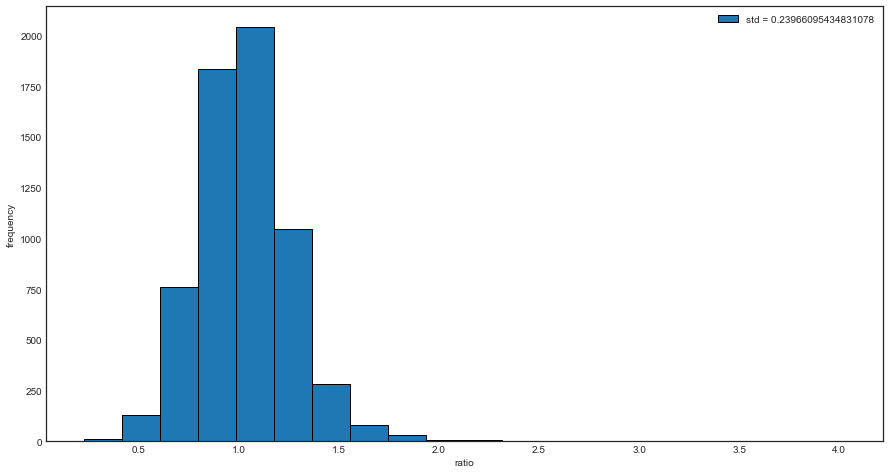

In [16]:
plt.figure(figsize=(15,8))
plt.hist(ratios,bins=20,edgecolor='black',label=f'std = {np.std(ratios)}')
plt.xlabel('ratio')
plt.ylabel('frequency')
plt.legend()
# plt.savefig('distribution')
plt.show()

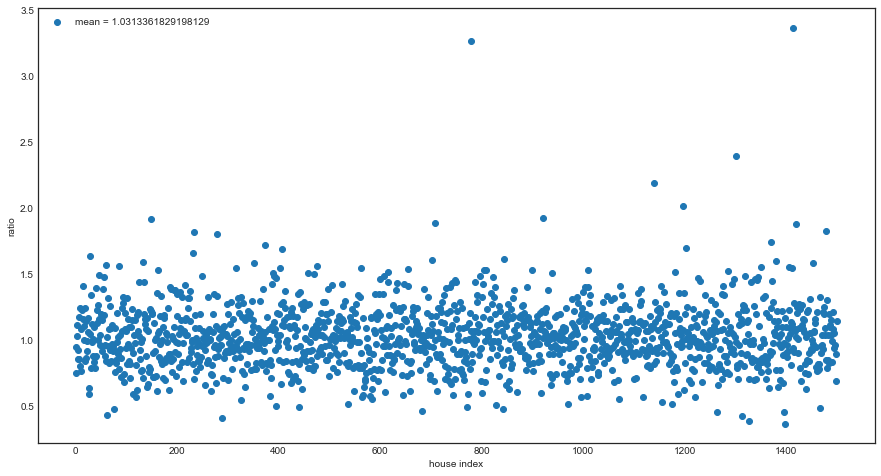

In [17]:
plt.figure(figsize=(15,8))
plt.scatter(range(len(ratios))[:1500],ratios[:1500],label=f'mean = {np.mean(ratios)}')
plt.xlabel('house index')
plt.ylabel('ratio')
plt.legend()
# plt.savefig('ratio plot')
plt.show()

In [18]:
r2_score(y_test,predictions)

0.7730028735605202

In [16]:
# new model
df_new = pd.read_excel('other_files/valid_data_with_year.xlsx')
df_new.head()


,Unnamed: 0,NBHD,PID,Situs,PrpCls,PrUse,CDU,Qual,YrRD,Remd,...,HSALandValue,TotAcres,V/I,Inst#,SaleDate,Price,SaleValidity,Sum801TLA,Raw Year,Relative year
0,0,7HST242,09-13-434-003-000,2525 RIDGE RD,R1,1,4.0,6.0,NaN,NaN,...,NaN,1.30,I,2016017053,2016-05-05,2122450.0,1,12026,2016,0
1,1,7HSE361,16-11-404-012-000,5330 S 93RD PL,R1,1,4.0,6.0,NaN,NaN,...,NaN,0.78,I,2022024921,2022-06-02,1950000.0,1,11047,2022,6
2,2,7HSE361,16-11-404-013-000,5410 S 93RD PL,R1,1,4.0,5.0,NaN,NaN,...,NaN,0.73,I,2021068025,2021-11-11,1875000.0,1,8816,2021,5
3,3,7AEA310,23-31-416-001-000,11737 SEABISCUIT LN,R1,12,4.0,5.0,NaN,NaN,...,1933-05-06 00:00:00,3.03,I,2022028838,2022-06-25,1850000.0,1,6935,2022,6
4,4,7HST242,09-13-402-005-000,2421 RIDGE RD,R1,1,5.0,5.0,2022.0,6.0,...,NaN,0.58,I,2022024045,2022-06-01,1800000.0,1,9936,2022,6


In [19]:
df_new.drop(columns="Unnamed: 0",inplace=True)

In [20]:
df_new.columns

Index(['NBHD', 'PID', 'Situs', 'PrpCls', 'PrUse', 'CDU', 'Qual', 'YrRD',
       'Remd', 'Imp', 'TLA', 'YrBlt', 'GarCap', 'Bedrm', 'FND', '801Units',
       '802Units', '803Units', 'FP', 'FixCt', 'Pool', 'LandType', 'Acres',
       'LandValue', 'Infl1', 'Infl2', 'HSA_Acres', 'HSALandValue', 'TotAcres',
       'V/I', 'Inst#', 'SaleDate', 'Price', 'SaleValidity', 'Sum801TLA',
       'Raw Year', 'Relative year'],
      dtype='object')

In [21]:
df_new.corr()['Price']

PrUse            0.195567
CDU              0.120910
Qual             0.575430
YrRD            -0.005322
Remd             0.020230
TLA              0.689752
YrBlt            0.476923
GarCap           0.597921
Bedrm            0.167392
FND              0.349925
801Units         0.728121
802Units         0.185000
803Units         0.689107
FP               0.309291
FixCt            0.727844
Pool             0.398349
Acres            0.032477
LandValue        0.798683
Infl1            0.005623
Infl2            0.131819
HSA_Acres        0.061069
TotAcres         0.263807
Inst#            0.265492
Price            1.000000
SaleValidity    -0.000904
Sum801TLA        0.786005
Raw Year         0.265928
Relative year    0.265928
Name: Price, dtype: float64

In [24]:
useful_df = df_new[['Sum801TLA','LandValue','Qual','FixCt','GarCap','TLA','FND','Relative year','Price']]

In [25]:
useful_df.dropna(how='any',inplace=True)

<ipython-input-25-864e3b5e881f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df.dropna(how='any',inplace=True)


In [26]:
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31196 entries, 0 to 34124
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sum801TLA      31196 non-null  int64  
 1   LandValue      31196 non-null  int64  
 2   Qual           31196 non-null  float64
 3   FixCt          31196 non-null  float64
 4   GarCap         31196 non-null  float64
 5   TLA            31196 non-null  float64
 6   FND            31196 non-null  float64
 7   Relative year  31196 non-null  int64  
 8   Price          31196 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 2.4 MB


In [27]:
X = useful_df[useful_df.columns[:-1]]
Y = useful_df[useful_df.columns[-1]]
# Y = np.reshape(list(Y),(-1,1))
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

In [28]:
model = LinearRegression().fit(x_train,y_train)
predictions = model.predict(x_test)

In [29]:
y_test = list(y_test)
ratios = [predictions[i]/y_test[i] for i in range(len(predictions))]
ratios = list(filter(lambda x:x!=float('inf'),ratios))

<ipython-input-29-2e634147cba2>:2: RuntimeWarning: divide by zero encountered in double_scalars
  ratios = [predictions[i]/y_test[i] for i in range(len(predictions))]


In [30]:
np.mean(ratios)

1.0129658683556984

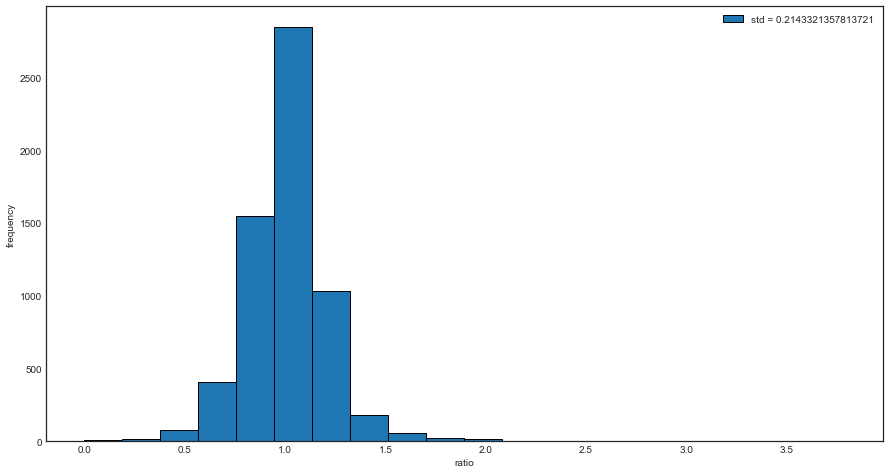

In [34]:
plt.figure(figsize=(15,8))
plt.hist(ratios,bins=20,edgecolor='black',label=f'std = {np.std(ratios)}')
plt.xlabel('ratio')
plt.ylabel('frequency')
plt.legend()
plt.savefig('distribution_with_year')
plt.show()

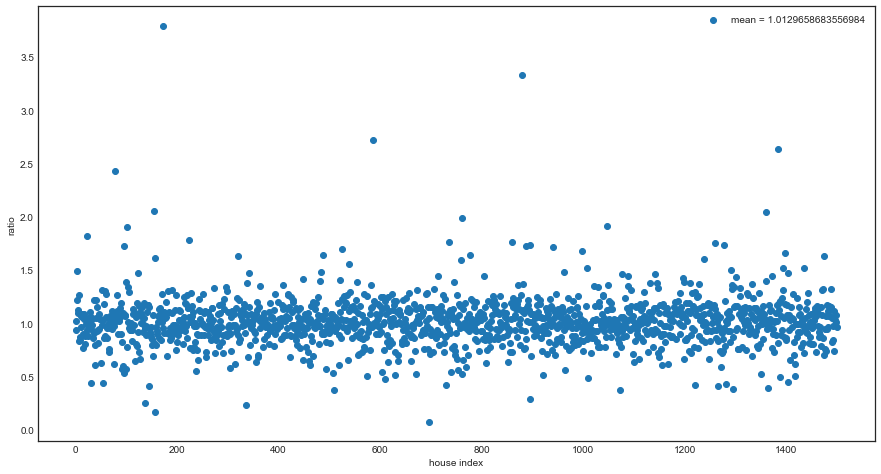

In [35]:
plt.figure(figsize=(15,8))
plt.scatter(range(len(ratios))[:1500],ratios[:1500],label=f'mean = {np.mean(ratios)}')
plt.xlabel('house index')
plt.ylabel('ratio')
plt.legend()
plt.savefig('ratio plot with year')
plt.show()

In [33]:
r2_score(y_test,predictions)

0.8326501293333974

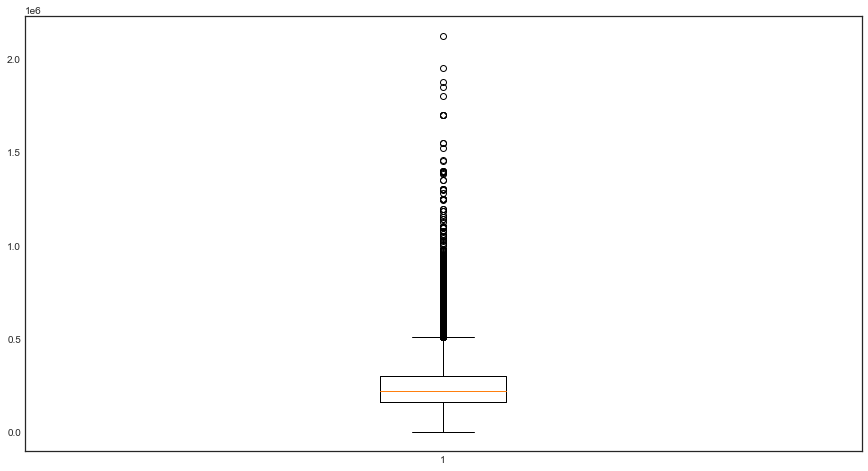

In [42]:
plt.figure(figsize=(15,8))
plt.boxplot(df['Price'])
plt.show()

In [41]:
df['Price'].median()

215000.0

In [59]:
def n_outliers(data):
    first_quartile = np.percentile(data,25)
    third_quartile = np.percentile(data,75)
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile + 2*IQR
    lower_limit = first_quartile - 2*IQR
    count = 0
    for point in data:
        if point < lower_limit or point > upper_limit:
            count += 1

    return count

In [60]:
for column in useful_df.columns:
    print(f'{column} {n_outliers(useful_df[column])}')

Sum801TLA 290
LandValue 635
Qual 6320
FixCt 269
GarCap 14544
TLA 562
FND 0
Relative year 0
Price 723
